In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings("ignore")

#matplotlib.use('agg')

In [3]:
#titulo_short = 'NH'
#titulo = 'Northern hemisphere'

#titulo_short = 'GO'
#titulo = 'Global Ocean'

#titulo_short = 'SH'
#titulo = 'Southern hemisphere'

titulo_short = 'NAtl'
titulo = 'NorthAtlantic'

In [4]:
Ylabel  = 'Temperatura [($^\circ$C)]'
Xlabel  = 'Fecha'

Title1  = 'Temperatura superficial promedio en el '+ titulo
File1 = './images/sstd_mean_'+titulo_short+'.png'
    
Title2  = 'Anomalia de temperatura superficial promedio en el '+ titulo + '\nAnomalia respecto de 1982-1992'
File2 = './images/sstd_anom_mean_'+titulo_short+'.png'
    
Title3  = 'Temperatura superficial en el '+ titulo
File3 = './images/sstd_'+titulo_short+'.png'

Title4  = 'Anomalia de temperatura superficial, respecto del periodo 1982-1992, en el '+ titulo
File4 = './images/sstd_anom_'+titulo_short+'.png'

## Reading data

In [5]:
# Daily data
data = xr.open_dataset('./data/sstd_mean_'+titulo_short+'.nc')
sstd = data.sst
data = xr.open_dataset('./data/sstd_anom_mean_'+titulo_short+'.nc')
sstd_anom = data.sst

In [6]:
#Monthly data
data = xr.open_dataset('./data/sstm_mean_'+titulo_short+'.nc')
sstm= data.sst
data = xr.open_dataset('./data/sstm_anom_mean_'+titulo_short+'.nc')
sstm_anom = data.sst

## Funciones

In [57]:
currentYear = datetime.date.today().year
sstHist=sst.sel(time=slice("1982-01-01", str(currentYear-1)+"-12-31"))

In [56]:
currentYear


2023

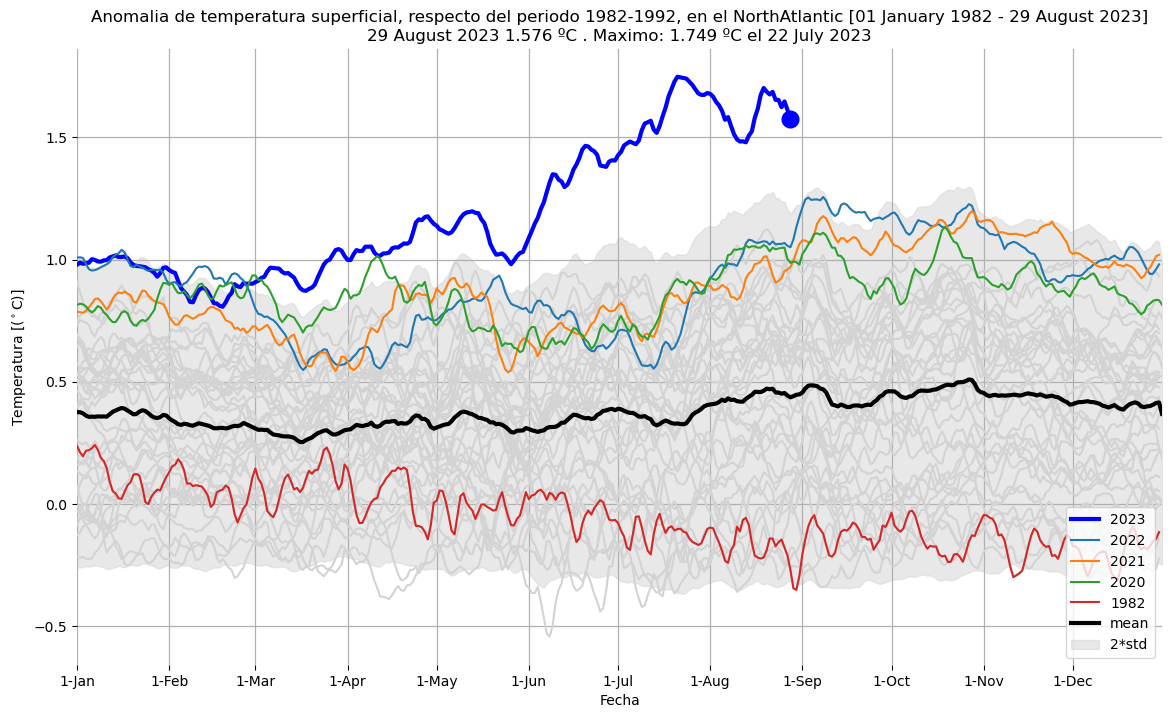

In [47]:
sst=sstd_anom
TituloFigura=Title4
Ymin=-0.25
Ymax=0.8
    
dTText = .2
    
df         = sstHist.groupby(sstHist.time.dt.dayofyear).mean().to_dataframe(name="mean")
df["std"]  = sstHist.groupby(sstHist.time.dt.dayofyear).std().values

for year, yearda in sst.groupby(sst.time.dt.year):
    df[year] = pd.Series(index=yearda["time"].dt.dayofyear,
                             data=yearda.values)
    
df.index   = pd.date_range(start='01/Jan/2020', end='31/12/2020', freq='D')  

currentYear = datetime.date.today().year
indLastData = np.where(df[currentYear].isnull())[0].tolist()[0]-1

date_form = DateFormatter("1-%b")
    
#Figura
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df.index,df[currentYear],'b',linewidth='3',label=currentYear)
for year in range(currentYear-4,1981,-1):
    ax.plot(df.index,df[year],color='#D3D3D3')

for year in range(currentYear-1,currentYear-4,-1):
    ax.plot(df.index,df[year],label=year)
        
ax.plot(df.index,df[1982],label='1982')

ax.plot(df.index[indLastData],df[currentYear][indLastData],'bo', markersize=12)
ax.plot(df.index,df["mean"],'k',linewidth='3',label='mean')
ax.fill_between(x=df.index, y1=df["mean"]+2*df["std"], 
                            y2=df["mean"]-2*df["std"],alpha=0.5, color='#D3D3D3',
                            label='2*std')
    
ax.set_xlim(df.index[0],df.index[365])
ax.xaxis.set_major_formatter(date_form)

ax.legend(loc = 4)
ax.grid(linestyle='-', linewidth=.9)

tPeriodo = ' ['+sst.time[0].dt.strftime("%d %B %Y").values + " - "+ sst.time[-1].dt.strftime("%d %B %Y").values + ']'
tTActual = sst.time[-1].dt.strftime("%d %B %Y").values + " %2.3f ºC "%(sst[-1].values)
tTMaxima = 'Maximo: ' + "%2.3f ºC"%(sst.isel(sst.argmax(...)).values)
tFechaTMaxima = ' el ' + sst.time.isel(sst.argmax(...)).dt.strftime("%d %B %Y").values

ax.set_title(TituloFigura + tPeriodo +'\n' + tTActual + '. ' + tTMaxima + tFechaTMaxima);


ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)

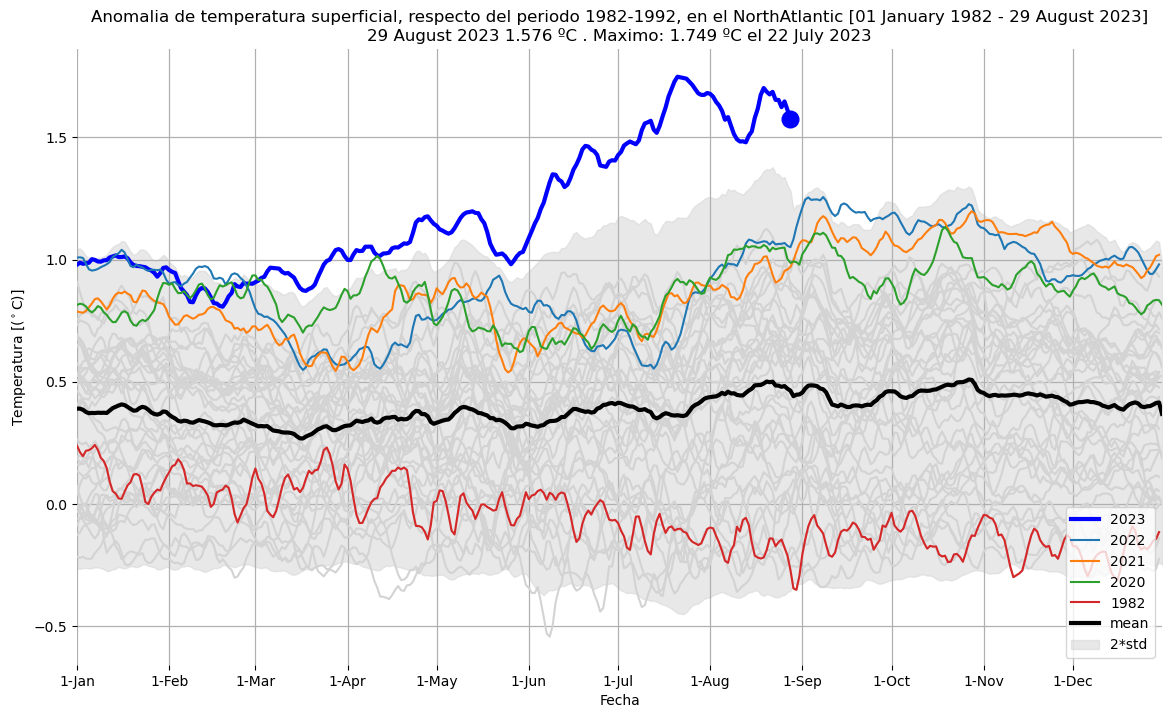

In [48]:
sst=sstd_anom
TituloFigura=Title4
Ymin=-0.25
Ymax=0.8
    
dTText = .2
    
df         = sst.groupby(sst.time.dt.dayofyear).mean().to_dataframe(name="mean")
df["std"]  = sst.groupby(sst.time.dt.dayofyear).std().values

for year, yearda in sst.groupby(sst.time.dt.year):
    df[year] = pd.Series(index=yearda["time"].dt.dayofyear,
                             data=yearda.values)
    
df.index   = pd.date_range(start='01/Jan/2020', end='31/12/2020', freq='D')  

currentYear = datetime.date.today().year
indLastData = np.where(df[currentYear].isnull())[0].tolist()[0]-1

date_form = DateFormatter("1-%b")
    
#Figura
fig, ax = plt.subplots(figsize=(14,8))

ax.plot(df.index,df[currentYear],'b',linewidth='3',label=currentYear)
for year in range(currentYear-4,1981,-1):
    ax.plot(df.index,df[year],color='#D3D3D3')

for year in range(currentYear-1,currentYear-4,-1):
    ax.plot(df.index,df[year],label=year)
        
ax.plot(df.index,df[1982],label='1982')

ax.plot(df.index[indLastData],df[currentYear][indLastData],'bo', markersize=12)
ax.plot(df.index,df["mean"],'k',linewidth='3',label='mean')
ax.fill_between(x=df.index, y1=df["mean"]+2*df["std"], 
                            y2=df["mean"]-2*df["std"],alpha=0.5, color='#D3D3D3',
                            label='2*std')
    
ax.set_xlim(df.index[0],df.index[365])
ax.xaxis.set_major_formatter(date_form)

ax.legend(loc = 4)
ax.grid(linestyle='-', linewidth=.9)

tPeriodo = ' ['+sst.time[0].dt.strftime("%d %B %Y").values + " - "+ sst.time[-1].dt.strftime("%d %B %Y").values + ']'
tTActual = sst.time[-1].dt.strftime("%d %B %Y").values + " %2.3f ºC "%(sst[-1].values)
tTMaxima = 'Maximo: ' + "%2.3f ºC"%(sst.isel(sst.argmax(...)).values)
tFechaTMaxima = ' el ' + sst.time.isel(sst.argmax(...)).dt.strftime("%d %B %Y").values

ax.set_title(TituloFigura + tPeriodo +'\n' + tTActual + '. ' + tTMaxima + tFechaTMaxima);


ax.set_ylabel(Ylabel)
ax.set_xlabel(Xlabel)
ax.set_frame_on(False)